# Task Description

This dataset is composed of 1300 samples with 35 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 2 possible values for the labels. The remaining columns are numeric
features.

Your task is the following: assuming that you want to classify this data with
Logistic Regression (implemented by sklearn.linear_model.LogisticRegression),
you should determine whether applying PCA to this dataset is useful, and if so
what number of components you would choose to use. At the end of the analysis,
you should have chosen an optimal strategy, including the optimal set of
parameters for the classifier: write this choice explicitly in the conclusions
of your notebook.

Your notebook should detail the procedure you have used to choose the optimal
parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on
the procedure employed, which should balance practical considerations (one may
not be able to exhaustively explore all possible combinations of the parameters)
with the desire for achieving the best possible performance in the least amount
of time.

Bonus points may be assigned for particularly clean/nifty code and/or well-
presented results.

You are also free to attempt other strategies beyond the one in the assignment
(which however is mandatory!).


# Data import and visualization

In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use("Solarize_Light2")


#common imports

In [2]:
data=pd.read_csv("C:/Users/frame/OneDrive/Desktop/mldata_0013115881.csv") #substitute this with path of the dataset on your device
data.head()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,0,0,1.611543,1.347034,-2.477540,-0.648427,2.997458,-2.055095,3.568420,0.024963,...,0.711302,0.798683,0.077489,-0.324108,0.414428,-1.383401,-0.836751,-0.132047,0.978134,0.452313
1,1,0,3.917373,0.685988,-0.435554,0.899043,-2.362151,2.223814,-2.702898,2.791828,...,-0.890966,5.405726,5.581480,0.448252,0.612576,0.396112,-1.524673,-0.705357,-1.203355,-1.195607
2,2,0,2.717954,-0.445983,-7.872529,0.782025,8.430989,-1.996975,-4.425246,2.615590,...,-0.210772,4.398679,-0.812820,-0.558464,0.180165,2.864181,-1.126173,0.722848,0.591242,0.511108
3,3,0,1.901960,3.610109,0.348900,2.747855,-1.228065,2.019494,4.431741,2.575430,...,-0.481207,-1.440814,4.625129,1.435616,1.298017,-0.978501,0.236653,3.553453,0.391204,0.486531
4,4,1,-2.949714,-2.270315,0.779124,-5.032824,-1.979701,-0.234704,0.385286,-2.307705,...,-1.791299,-1.612790,5.289838,-1.487783,0.175782,-1.466157,-0.096423,0.203877,-0.340325,0.164393


In [3]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       1300 non-null   int64  
 1   feature_1   1300 non-null   float64
 2   feature_2   1300 non-null   float64
 3   feature_3   1300 non-null   float64
 4   feature_4   1300 non-null   float64
 5   feature_5   1300 non-null   float64
 6   feature_6   1300 non-null   float64
 7   feature_7   1300 non-null   float64
 8   feature_8   1300 non-null   float64
 9   feature_9   1300 non-null   float64
 10  feature_10  1300 non-null   float64
 11  feature_11  1300 non-null   float64
 12  feature_12  1300 non-null   float64
 13  feature_13  1300 non-null   float64
 14  feature_14  1300 non-null   float64
 15  feature_15  1300 non-null   float64
 16  feature_16  1300 non-null   float64
 17  feature_17  1300 non-null   float64
 18  feature_18  1300 non-null   float64
 19  feature_19  1300 non-null  

In [5]:
data.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,0.493846,0.185473,0.161497,0.630980,0.071110,0.647790,0.757459,-0.542927,0.539368,-0.429706,...,0.096798,0.087029,0.783566,0.137249,0.074562,-0.425704,0.104464,0.615429,0.115580,0.108541
std,0.500155,2.975859,2.802108,2.847829,2.841591,2.959652,2.951727,2.869888,2.932774,2.689219,...,0.998149,2.819894,5.974066,1.006109,0.966171,2.790838,1.001414,3.019351,1.014541,1.008466
min,0.000000,-8.243773,-9.997493,-8.841415,-9.227913,-9.120931,-8.853043,-11.303272,-8.788638,-9.078609,...,-3.614001,-9.459131,-16.801368,-3.116285,-3.802614,-9.533251,-3.358281,-9.381453,-3.120374,-2.808133
25%,0.000000,-1.777076,-1.815337,-1.275786,-1.825974,-1.339117,-1.249031,-2.537498,-1.336565,-2.281730,...,-0.594944,-1.758136,-3.385048,-0.516827,-0.578101,-2.240234,-0.555362,-1.279829,-0.557386,-0.590843
50%,0.000000,0.213624,0.098016,0.621447,-0.040531,0.746583,0.727509,-0.514977,0.609383,-0.420746,...,0.132035,0.008735,0.553334,0.131619,0.082264,-0.461137,0.078324,0.640733,0.116989,0.137621
75%,1.000000,2.124084,2.092229,2.602825,1.904934,2.665705,2.828170,1.467394,2.520398,1.467780,...,0.795014,2.093332,4.941866,0.815519,0.740479,1.526593,0.784713,2.586235,0.824599,0.793375
max,1.000000,10.353632,8.885814,9.785832,9.939302,12.301682,9.543605,8.827469,9.623313,7.469029,...,3.321757,8.636927,21.289065,2.980514,3.810377,9.041780,3.342625,11.870427,3.099619,3.302011


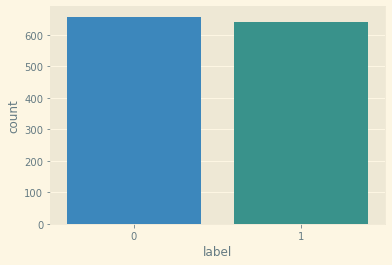

In [6]:
sns.countplot(x="label", data=data)
plt.show()

Targets are pretty balanced.

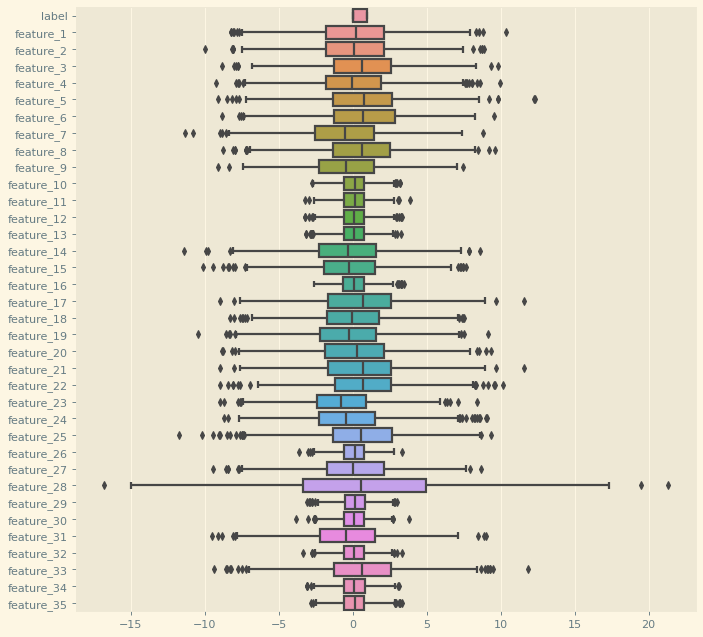

In [7]:
plt.figure(figsize=(10,10), dpi=80)
sns.boxplot(data=data, orient="h")
plt.show()

Boxplot graph is useful to show outliers.

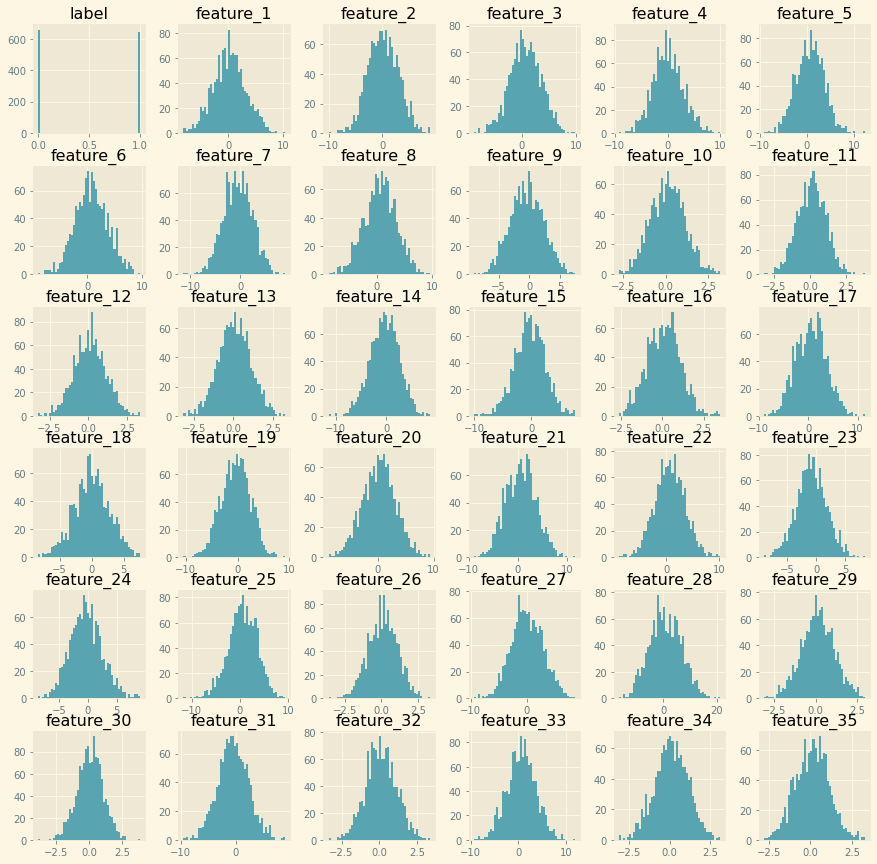

In [8]:
data.hist(bins=50,figsize=(15,15), color='#58A4B0', )
plt.show()

Data seems to be already standardized

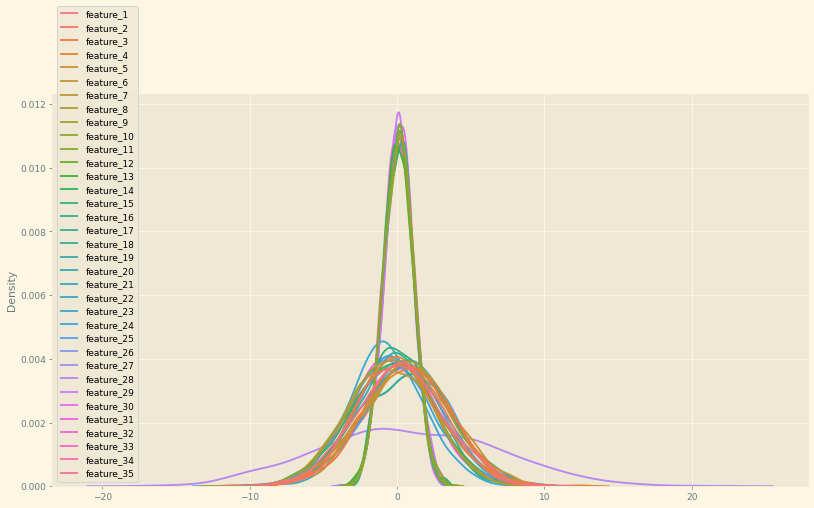

In [9]:
plt.figure(figsize=(15,8), dpi=65)
sns.kdeplot(data=data.drop(columns=["label"]))
plt.show()

In [10]:
corr_matrix = data.corr()
corr_matrix["label"].sort_values(ascending=False)

label         1.000000
feature_25    0.239118
feature_22    0.206072
feature_7     0.202355
feature_8     0.182262
feature_15    0.181280
feature_24    0.177959
feature_6     0.150559
feature_3     0.145356
feature_21    0.131255
feature_17    0.131255
feature_28    0.128994
feature_35    0.056790
feature_4     0.025050
feature_11    0.021220
feature_27    0.015520
feature_29   -0.003846
feature_20   -0.004389
feature_12   -0.007773
feature_10   -0.008014
feature_32   -0.009396
feature_16   -0.012538
feature_30   -0.018726
feature_23   -0.024060
feature_18   -0.028696
feature_34   -0.029649
feature_26   -0.038677
feature_13   -0.040352
feature_5    -0.149129
feature_19   -0.160222
feature_31   -0.162564
feature_33   -0.171785
feature_9    -0.205387
feature_14   -0.231834
feature_1    -0.346916
feature_2    -0.350932
Name: label, dtype: float64

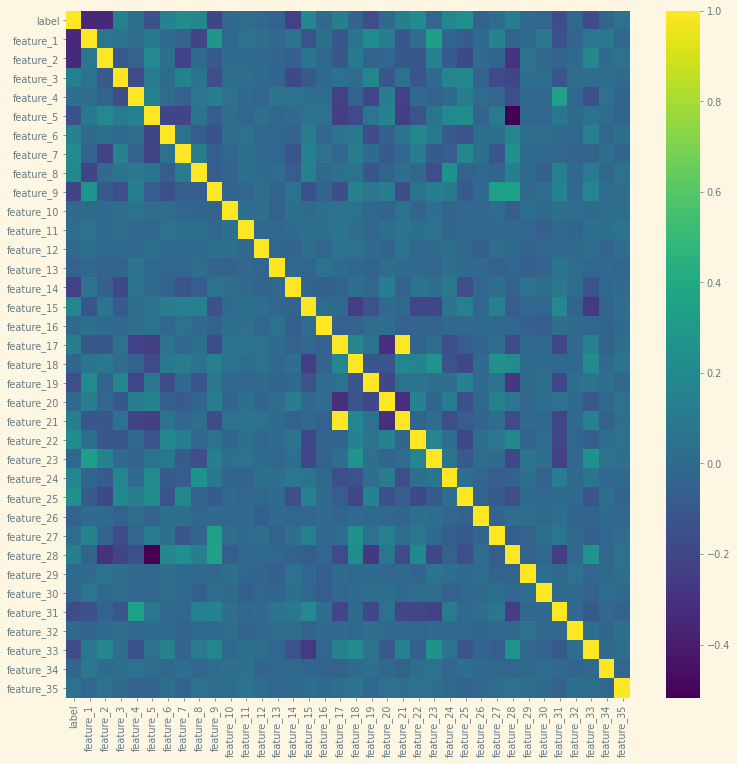

In [11]:
plt.figure(figsize=(13,13), dpi=70)
sns.heatmap(corr_matrix, cmap="viridis", annot=False)
plt.show()

As we can see from the correlation matrix features 17 and 21 are perfectly correlated, so we can drop one of them.

In [12]:
data.drop(columns=["feature_21"], inplace=True)

I start dividing the sample data into features and targets:

In [13]:
df = data.iloc[:, 1:]
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,1.611543,1.347034,-2.477540,-0.648427,2.997458,-2.055095,3.568420,0.024963,-3.470625,1.356695,...,0.711302,0.798683,0.077489,-0.324108,0.414428,-1.383401,-0.836751,-0.132047,0.978134,0.452313
1,3.917373,0.685988,-0.435554,0.899043,-2.362151,2.223814,-2.702898,2.791828,1.530117,0.723417,...,-0.890966,5.405726,5.581480,0.448252,0.612576,0.396112,-1.524673,-0.705357,-1.203355,-1.195607
2,2.717954,-0.445983,-7.872529,0.782025,8.430989,-1.996975,-4.425246,2.615590,2.043099,0.310694,...,-0.210772,4.398679,-0.812820,-0.558464,0.180165,2.864181,-1.126173,0.722848,0.591242,0.511108
3,1.901960,3.610109,0.348900,2.747855,-1.228065,2.019494,4.431741,2.575430,-0.418708,-0.114577,...,-0.481207,-1.440814,4.625129,1.435616,1.298017,-0.978501,0.236653,3.553453,0.391204,0.486531
4,-2.949714,-2.270315,0.779124,-5.032824,-1.979701,-0.234704,0.385286,-2.307705,-0.694062,-1.336652,...,-1.791299,-1.612790,5.289838,-1.487783,0.175782,-1.466157,-0.096423,0.203877,-0.340325,0.164393


In [14]:
targets = data.iloc[:,0]
targets.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

# Data preparation


In [15]:
pd.set_option('mode.chained_assignment',None) #to avoid display of chained assignment warning
training_data, test_data = train_test_split(data, test_size=0.20)

training_targets = training_data.iloc[:, 0] 
test_targets =  test_data.iloc[:, 0]

training_data.drop(columns=["label"], inplace=True)
test_data.drop(columns=["label"], inplace=True)

I split the data set into training (80%) and test data (20%) 

In [16]:
training_data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
531,-2.636600,0.061421,-2.027404,-1.455697,0.818136,-3.922322,-2.519782,1.587167,0.690896,-0.732356,...,0.747748,0.027774,2.433042,0.073659,-1.377697,1.022616,0.306690,-0.200830,0.827174,1.710575
898,5.611555,-1.422616,-3.977288,0.800848,8.534995,0.831022,0.767428,-0.064908,-0.927350,-1.164449,...,1.249442,2.317738,-4.924685,-0.476034,1.359762,3.468280,-0.088972,3.047309,1.536984,0.646754
649,1.838720,2.104275,7.266012,-4.264073,2.479123,5.964623,-2.212567,-0.916837,-2.510224,0.164292,...,-1.160735,2.190320,-8.320628,2.980514,0.357570,-0.732714,0.175917,-1.092128,-0.799065,-0.854732
91,-2.338593,-1.246576,-4.252971,2.661043,3.399785,0.392903,-4.337690,5.131226,3.886949,-0.670135,...,0.424116,6.431987,4.971510,-1.717025,0.096648,7.066533,-0.449019,-0.304083,-2.160153,-1.251530
25,3.594480,2.254519,-0.705369,-0.233048,3.549119,-3.362007,2.533001,-5.516143,1.152320,-1.606734,...,0.295986,-0.524497,-1.608246,0.977937,0.435432,-4.075217,1.810792,2.261190,-0.574561,-0.814391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0.752896,3.886839,-1.854651,-0.588657,4.199870,-0.007609,-2.524846,-0.310547,-2.253224,-0.317519,...,-0.929521,-0.683506,3.711042,-0.850693,-0.356719,-4.216020,-0.417601,2.901180,-0.078934,0.762473
1177,-2.681627,-0.307958,0.864478,-2.032858,-2.451474,1.440227,-3.704998,-3.693980,-0.895431,-0.134237,...,-0.610896,-1.584997,5.451195,-0.049683,0.348089,1.108674,-1.762181,1.903844,0.844799,0.969602
925,-3.014000,1.307954,1.559316,-1.725337,2.054830,-6.085456,-4.571000,-0.990013,1.684974,-1.105543,...,0.472491,0.712179,-6.823234,0.107829,0.696964,4.113776,0.573099,8.687704,-0.756804,-0.145844
105,6.057626,-2.055943,2.949005,-4.669404,2.126802,0.244755,-1.933787,2.769695,-1.604538,0.461161,...,1.075045,6.702129,-0.631548,1.053582,0.451032,-9.098523,-0.370444,-3.368931,2.383790,1.280730


# Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler= StandardScaler()
scaler.fit(training_data)

StandardScaler()

In [19]:
training_scaled_data= pd.DataFrame(scaler.transform(training_data))
training_scaled_data.columns = list(df.columns)

test_scaled_data= pd.DataFrame(scaler.transform(test_data))
test_scaled_data.columns = list(df.columns)

df_st = np.concatenate((training_scaled_data.copy(), test_scaled_data.copy()), axis = 0) #to store all the standadized data for later

training_scaled_data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,-0.934430,-0.013054,-0.942290,-0.528493,0.072995,-1.599823,-0.693254,0.347657,0.405393,-0.827041,...,0.638938,-0.027248,0.245634,-0.078862,-1.518147,0.542682,0.166827,-0.278790,0.729369,1.584519
1,1.803670,-0.542616,-1.630106,0.269329,2.685917,0.013409,0.438640,-0.221823,-0.182033,-1.249851,...,1.137927,0.780884,-0.978359,-0.627734,1.326818,1.417226,-0.228356,0.804950,1.437460,0.530517
2,0.551220,0.715915,2.335935,-1.521421,0.635403,1.755695,-0.587470,-0.515488,-0.756618,0.050345,...,-1.259258,0.735918,-1.543291,2.823652,0.285267,-0.085006,0.036212,-0.576171,-0.892931,-0.957109
3,-0.835503,-0.479798,-1.727352,0.927019,0.947139,-0.135284,-1.319220,1.569316,1.565564,-0.766157,...,0.317051,2.232809,0.667920,-1.866872,0.014098,2.703923,-0.587968,-0.313240,-2.250722,-1.350245
4,1.134071,0.769528,-0.475946,-0.096214,0.997703,-1.409658,1.046585,-2.100895,0.572890,-1.682635,...,0.189611,-0.222145,-0.426654,0.824065,0.366188,-1.280250,1.669111,0.542662,-0.668971,-0.917141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,0.190764,1.352004,-0.881352,-0.221943,1.218047,-0.271213,-0.694998,-0.306496,-0.663327,-0.421116,...,-1.029290,-0.278260,0.458235,-1.001834,-0.457073,-1.330599,-0.556588,0.756194,-0.174544,0.645168
1036,-0.949378,-0.144863,0.077813,-0.732554,-1.034093,0.220166,-1.101363,-1.472785,-0.170446,-0.241771,...,-0.712383,-0.596397,0.747718,-0.202020,0.275414,0.573455,-1.899543,0.423434,0.746952,0.850385
1037,-1.059714,0.431757,0.322915,-0.623827,0.491738,-2.333966,-1.399557,-0.540712,0.766244,-1.192211,...,0.365165,0.214280,-1.294192,-0.044743,0.637990,1.648048,0.432915,2.686866,-0.850773,-0.254765
1038,1.951750,-0.768612,0.813124,-1.664729,0.516108,-0.185564,-0.491477,0.755282,-0.427853,0.340836,...,0.964471,2.328143,-0.264175,0.899597,0.382400,-3.076532,-0.509488,-1.335826,2.282215,1.158642


I decided to convert my data after scaling into Pandas DataFrame to visualize it better.

In [20]:
training_scaled_data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
count,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,...,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03
mean,-2.506008e-17,-1.206300e-17,7.472655e-18,4.109960e-17,1.387779e-18,3.864430e-17,4.095866e-17,3.202566e-19,-4.019221e-17,4.910602e-18,...,-1.801444e-17,-3.672276e-17,-1.227650e-17,6.533235e-17,-1.547907e-17,1.152924e-17,-6.501877e-18,-2.775558e-17,-6.405133e-19,-8.593553e-18
std,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,...,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00
min,-2.795817e+00,-3.602465e+00,-3.345912e+00,-3.276433e+00,-3.292365e+00,-3.273254e+00,-3.717699e+00,-3.228944e+00,-3.140951e+00,-2.704623e+00,...,-3.699300e+00,-3.375191e+00,-2.954103e+00,-3.046540e+00,-3.205203e+00,-3.231986e+00,-3.493713e+00,-3.341901e+00,-3.208617e+00,-2.755335e+00
25%,-6.717056e-01,-7.003729e-01,-6.811087e-01,-6.698245e-01,-6.866447e-01,-6.851486e-01,-7.073172e-01,-6.322539e-01,-6.953431e-01,-7.323876e-01,...,-7.105541e-01,-6.688002e-01,-7.082827e-01,-6.695564e-01,-6.730194e-01,-6.463267e-01,-6.495621e-01,-6.180566e-01,-6.881066e-01,-7.023598e-01
50%,9.283807e-03,-3.277094e-03,-2.953062e-02,-5.853934e-02,4.565305e-02,-1.949317e-02,1.414565e-02,2.228286e-02,5.991687e-03,-2.081821e-03,...,3.844878e-02,-2.574705e-02,-3.761387e-02,4.185463e-03,-8.505057e-04,-1.726428e-03,-8.978137e-03,-5.257742e-03,-1.150929e-02,1.192340e-02
75%,6.289974e-01,7.005573e-01,7.089157e-01,6.642639e-01,6.889659e-01,7.088186e-01,7.099472e-01,6.570059e-01,6.892634e-01,6.546148e-01,...,6.942378e-01,7.139311e-01,7.044245e-01,6.677209e-01,6.820632e-01,6.954211e-01,6.738871e-01,6.747698e-01,7.060197e-01,6.845332e-01
max,3.377874e+00,3.135832e+00,3.224794e+00,3.500315e+00,3.943713e+00,2.970361e+00,3.213978e+00,3.117765e+00,2.865864e+00,3.032042e+00,...,2.638842e+00,2.769723e+00,3.382424e+00,2.823652e+00,3.873674e+00,3.410251e+00,3.199093e+00,2.944134e+00,2.996310e+00,3.161264e+00


Performing PCA on data that is not standardized could lead to scaling problems, therefore I standardize the data using StandardScaler before applying PCA.

# PCA (Explained Variance Method)

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(0.95)

Instead of exhaustively trying every possible number of principal components and evaluating the performance, to choose the best number of principal components for PCA, I decided to input in pca a number between 0 and 1, by doing this 
PCA selects the minimum number of components such that the amount of explained variance is greater than the percentage specified by n_components.

In [23]:
pca.fit(training_scaled_data)

PCA(n_components=0.95)

In [24]:
x_pca = pca.transform(training_scaled_data)

In [25]:
training_scaled_data.shape

(1040, 34)

In [26]:
pca.explained_variance_ratio_

array([0.07585051, 0.06486641, 0.06473368, 0.04874903, 0.04555866,
       0.04024238, 0.03942978, 0.03749627, 0.03658695, 0.03433849,
       0.03295403, 0.0313098 , 0.03006623, 0.02988806, 0.02944684,
       0.02908361, 0.02814255, 0.02711839, 0.02645332, 0.0260249 ,
       0.02561234, 0.024074  , 0.02331886, 0.02224416, 0.02071868,
       0.02018046, 0.01754783, 0.01392384, 0.01237744])

In [27]:
np.sum(pca.explained_variance_ratio_)

0.9583374846586195

In [28]:
x_pca.shape

(1040, 29)

In this case the algorithm has chosen 29 principal components so that the sum of the explained variance is greater than 0.95.

In [29]:
training_data_pca = pca.transform(training_data)
test_data_pca = pca.transform(test_data)

Finally, I apply the mapping transform also to the test set.

In [30]:
training_features_pca = pd.DataFrame(training_data_pca)
test_features_pca = pd.DataFrame(test_data_pca)

df_pca = np.concatenate((training_data_pca.copy(), test_data_pca.copy()), axis = 0)

training_features_pca.columns = list(df.columns[0:x_pca.shape[1]])
test_features_pca.columns = list(df.columns[0:x_pca.shape[1]])


I also convert all the data into Pandas DataFrame.

# Logistic regression on PCA data

In [31]:
import timeit

This will allow me to make further considerations about performance based on speed.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [33]:
start = timeit.default_timer() #to keep track of running time
param_grid={
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],
        'max_iter' : [500, 1000],
        'penalty': ['l2'],
        'solver' : ['newton-cg', 'lbfgs']
    }

grid_pca = GridSearchCV(LogisticRegression(), param_grid, cv=12, scoring='accuracy', refit='True', verbose=0)
grid_pca.fit(training_features_pca, training_targets)

best_C_pca = grid_pca.best_params_['C']
grid_pca.best_params_

{'C': 0.001, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'}

I use GridSearchCv to find the best parameter for the logistic regression.

In [34]:
log_reg_pca = LogisticRegression(C=best_C_pca, solver="newton-cg", random_state=42, penalty='l2', max_iter=500) #actually only 'C' parameter changes depending on the random split so the other parameters are fixed 
log_reg_pca.fit(training_features_pca, training_targets)

stop = timeit.default_timer()
Time_pca= (stop-start)

And performed LogisticRegression with the best parameters obtained.

# Logistic regression (without PCA)

In [35]:
start_1 = timeit.default_timer()

param_grid={
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],
        'max_iter' : [500, 1000],
        'penalty': ['l2'],
        'solver' : ['newton-cg', 'lbfgs']
    }

grid = GridSearchCV(LogisticRegression(), param_grid, cv=12, scoring='accuracy', refit='True', verbose=0)
grid.fit(training_scaled_data, training_targets)

best_C_not_pca = grid.best_params_['C']
grid.best_params_

{'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'}

In [36]:
log_reg = LogisticRegression(C=best_C_not_pca, solver="newton-cg", random_state=42, penalty='l2', max_iter=500)
log_reg.fit(training_scaled_data, training_targets)

stop_1 = timeit.default_timer()
Time_not_pca= (stop_1-start_1)

# Performance metrics

In [37]:
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [38]:
predictions_pca = log_reg_pca.predict(test_features_pca)
predictions_not_pca = log_reg.predict(test_scaled_data)

Below I show mean squred error, accuracy, classification report, confusion matrix and cross validation score on training set of the LogisticRegression with PCA data.

In [39]:
mean_squared_error_pca= mean_squared_error(test_targets, predictions_pca)
mean_squared_error_pca

0.16538461538461538

In [40]:
accuracy_pca = accuracy_score(test_targets, predictions_pca)
accuracy_pca

0.8346153846153846

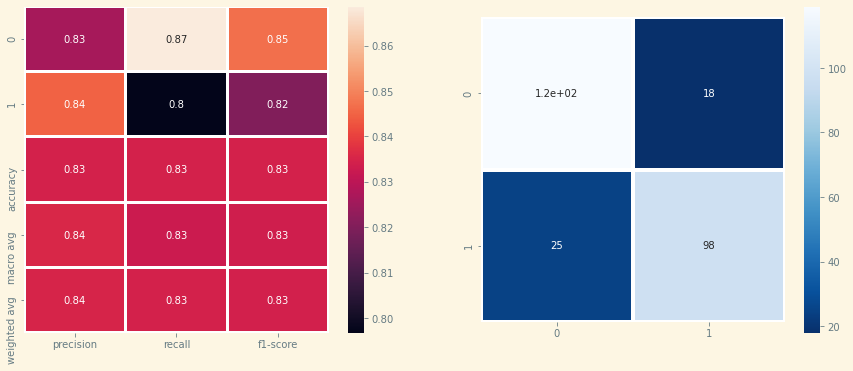

In [41]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
clf_report = classification_report(test_targets, predictions_pca, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, linewidths=2, annot=True)

ax2 = fig.add_subplot(122)
cm = confusion_matrix(test_targets, predictions_pca)
sns.heatmap(cm, annot=True, linewidths=3, square = True, cmap = 'Blues_r')
plt.show()

Here I show the classification report including differnt perfomance measures such as recall and f-1 score and the confusion matrix that shows if the model is mislabeling one class as another one.

In [42]:
cross_val_score_train_pca =  cross_val_score(log_reg_pca, training_data_pca, training_targets, cv=10).mean()
cross_val_score_train_pca

0.8423076923076923

Then I show the same performance measures relative to the LogisticRegression without PCA data.

In [43]:
mean_squared_error_not_pca= mean_squared_error(test_targets, predictions_not_pca)
mean_squared_error_not_pca

0.1346153846153846

In [44]:
accuracy_not_pca = accuracy_score(test_targets, predictions_not_pca)
accuracy_not_pca

0.8653846153846154

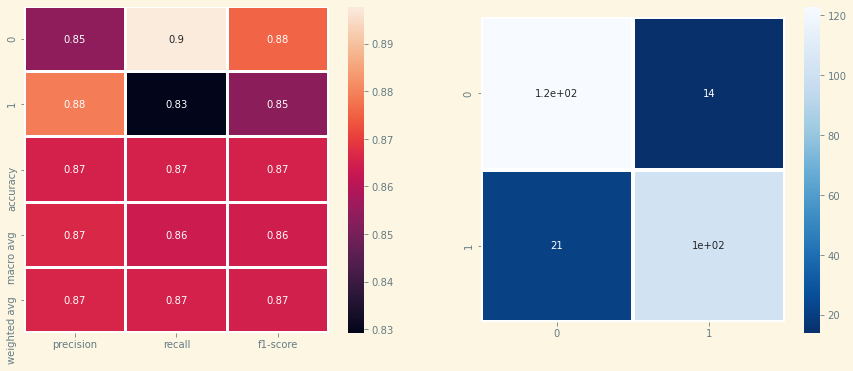

In [45]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
clf_report = classification_report(test_targets, predictions_not_pca, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, linewidths=2, annot=True)

ax2 = fig.add_subplot(122)
cm = confusion_matrix(test_targets, predictions_not_pca)
sns.heatmap(cm, annot=True, linewidths=3, square = True, cmap = 'Blues_r')
plt.show()

In [46]:
cross_val_score_train =  cross_val_score(log_reg, training_scaled_data, training_targets, cv=10).mean()
cross_val_score_train

0.8413461538461539

The accuracy in both cases is pretty high (around 0.80).

# Visual Approach

We can select the best number of principal components by selecting the one that maximizes the cross validation score on the training set of our regression, always remembering that the performance on the trainig set, on which the model has been trained,  is different from the performance on the test set, that is the one that we want to be high in the end.

In [47]:
start_2 = timeit.default_timer()
log_reg = LogisticRegression()

cv_list = []

pca = PCA()

X_train_pc = pca.fit_transform(training_scaled_data)

In [48]:
for i in range(1, X_train_pc.shape[1]+1):
    cv_score =  cross_val_score(log_reg, 
                                      X_train_pc[:,:i], 
                                      training_targets, 
                                      cv=10).mean()
                                      
    cv_list.append(cv_score) 

The code above loops trough different numbers of principal components for logistic regression and storing the cross validation score at each iteration.

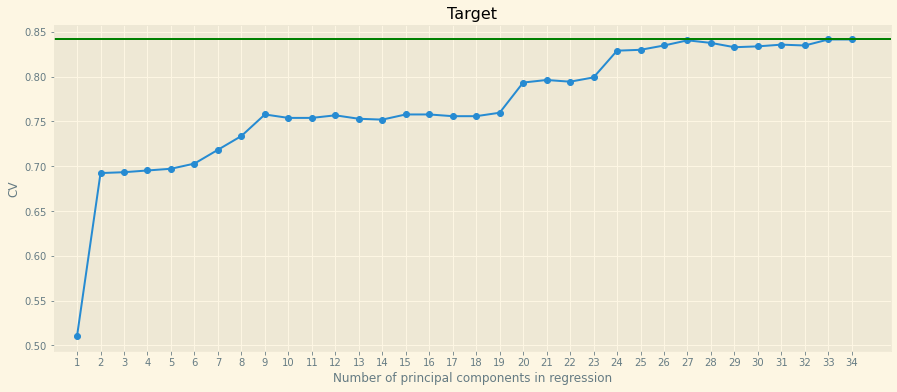

In [49]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(cv_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('CV')
plt.title('Target')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=cross_val_score_train, color='g', linestyle='-')

In the plot above we can visually see the maximum and on the x-axis the number related to it which represents the best number of components if our goal is to maximize the cross validation score on the training set.

In [50]:
max_ind = cv_list.index(max(cv_list))+1
max_ind

33

Below I perform another LogisticRegression with the best number of principal components for pca indicated in the plot above.

In [51]:
pd.set_option('mode.chained_assignment',None) #to avoid display of chained assignment warning
training_data, test_data = train_test_split(data, test_size=0.20)

training_targets = training_data.iloc[:, 0] 
test_targets =  test_data.iloc[:, 0]

training_data.drop(columns=["label"], inplace=True)
test_data.drop(columns=["label"], inplace=True)

In [52]:
scaler= StandardScaler()
scaler.fit(training_data)

StandardScaler()

In [53]:
training_scaled_data= pd.DataFrame(scaler.transform(training_data))
test_scaled_data= pd.DataFrame(scaler.transform(test_data))

In [54]:
pca = PCA(max_ind)

In [55]:
pca.fit(training_scaled_data)

PCA(n_components=33)

In [56]:
training_data_pca_visual = pca.transform(training_data)
test_data_pca_visual = pca.transform(test_data)

In [57]:
training_features_pca_visual = pd.DataFrame(training_data_pca_visual)
test_features_pca_visual = pd.DataFrame(test_data_pca_visual)

training_features_pca_visual.columns = list(df.columns[0:max_ind])
test_features_pca_visual.columns = list(df.columns[0:max_ind])

In [58]:
param_grid={
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],
        'max_iter' : [500, 1000],
        'penalty': ['l2'],
        'solver' : ['newton-cg', 'lbfgs']
    }

grid_pca_visual = GridSearchCV(LogisticRegression(), param_grid, cv=12, scoring='accuracy', refit='True', verbose=0)
grid_pca_visual.fit(training_features_pca_visual, training_targets)

best_C_pca_visual = grid_pca_visual.best_params_['C']
grid_pca_visual.best_params_

{'C': 0.01, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'}

In [59]:
log_reg_pca_visual = LogisticRegression(C=best_C_pca_visual, solver="newton-cg", random_state=42, penalty='l2', max_iter=500)  
log_reg_pca_visual.fit(training_features_pca_visual, training_targets)
stop_2 = timeit.default_timer()
Time_visual= (stop_2-start_2)

# Performance measures

In [60]:
predictions_pca_visual = log_reg_pca_visual.predict(test_features_pca_visual)

In [61]:
mean_squared_error_pca_visual= mean_squared_error(test_targets, predictions_pca_visual)
mean_squared_error_pca_visual

0.18076923076923077

In [62]:
accuracy_pca_visual = accuracy_score(test_targets, predictions_pca_visual)
accuracy_pca_visual

0.8192307692307692

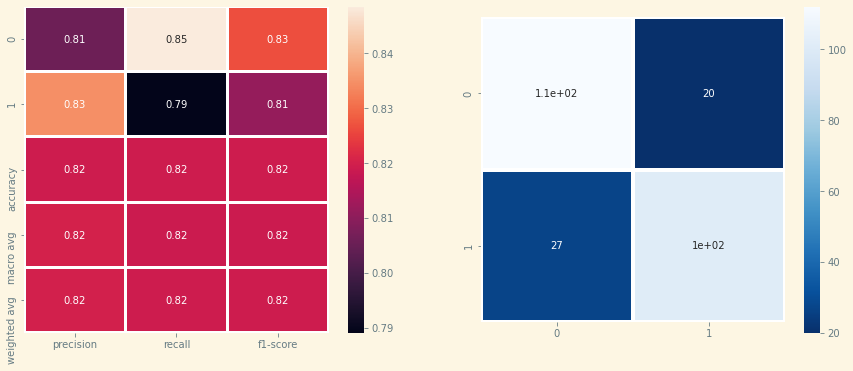

In [63]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
clf_report = classification_report(test_targets, predictions_pca_visual, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, linewidths=2, annot=True)

ax2 = fig.add_subplot(122)
cm = confusion_matrix(test_targets, predictions_pca_visual)
sns.heatmap(cm, annot=True, linewidths=3, square = True, cmap = 'Blues_r')
plt.show()

In [64]:
cross_val_score_train_pca_visual =  cross_val_score(log_reg_pca_visual, training_data_pca_visual, training_targets, cv=10).mean()
cross_val_score_train_pca_visual

0.8548076923076924

As we can see accuracy is now lower than without PCA and the number of principal components is (usually) lower too, but this method could lead to some issues regarding generalization as we are optimizing performance on the training set.

# Pipeline strategy

In this section I decided to implement a different strategy in order to find the optimal vallue fr the logistic regression and the optimal number of principal components:

I use a pipeline to optimize my parameters, including the number of principal components, using GridSearchCV, so that I can also check my results by cross validation.

In [65]:
from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition

In [66]:
start_3 = timeit.default_timer()

sc = StandardScaler() #scaler object

pca = decomposition.PCA() #PCA object

logistic = linear_model.LogisticRegression() #logistic regression object

In [67]:
pipe= Pipeline(steps=[('sc', sc),
                     ('pca', pca),
                     ('logistic', logistic)])

Here I implemented the pipeline using StandardScaler and PCA:

In [68]:
n_components= list(range(1,df.shape[1]+1,1))

In [69]:
C = np.logspace(-4, 4, 50)

In [70]:
penalty = ['l2']

In [71]:
parameters = dict(pca__n_components=n_components,
                 logistic__C=C,
                 logistic__penalty=penalty)

These are the parameters to optimize and by using scoring=None in GridSearchCV, the strategy to evaluate performance will be the accuracy.

In [72]:
clf = GridSearchCV(pipe, parameters)

clf.fit(df, targets)

stop_3 = timeit.default_timer()
Time_pipeline= (stop_3-start_3)

In [73]:
print('Best Penalty:', clf.best_estimator_.get_params()['logistic__penalty'])
print('Best C:', clf.best_estimator_.get_params()['logistic__C'])
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); print(clf.best_estimator_.get_params()['logistic'])



Best Penalty: l2
Best C: 0.08685113737513521
Best Number Of Components: 33

LogisticRegression(C=0.08685113737513521)


In [74]:
CV_Result = cross_val_score(clf, df, targets, cv=5, n_jobs=-1)
print(); print('CV_result:', CV_Result)
print(); print('Mean of CV_Result:',CV_Result.mean())
print(); print('Standard Deviation of CV_Result:',CV_Result.std())


CV_result: [0.88461538 0.85       0.83461538 0.82692308 0.82307692]

Mean of CV_Result: 0.8438461538461539

Standard Deviation of CV_Result: 0.022373907034229208


I also use cross validation to check the Cross Validation score of our LogisticRegression.

# Alternative models

In this section I try to choose an alternative model, based on mean_squared_error, so I randomly split my data again and I perform PCA.

In [75]:
pd.set_option('mode.chained_assignment',None) #to avoid display of chained assignment warning
training_data, test_data = train_test_split(data, test_size=0.20)

training_targets = training_data.iloc[:, 0] 
test_targets =  test_data.iloc[:, 0]

training_data.drop(columns=["label"], inplace=True)
test_data.drop(columns=["label"], inplace=True)

In [76]:
scaler= StandardScaler()
scaler.fit(training_data)

StandardScaler()

In [77]:
training_scaled_data= pd.DataFrame(scaler.transform(training_data))
test_scaled_data= pd.DataFrame(scaler.transform(test_data))

In [78]:
pca = PCA(n_components=33)
pca.fit(training_scaled_data)

PCA(n_components=33)

In [79]:
training_data_pca = pca.transform(training_data)
test_data_pca = pca.transform(test_data)

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

models=dict()

models["Support Vector Machine Regressor"]=SVR()
models["Gradient Boosting Regressor"]=GradientBoostingRegressor()
models["RandomForestRegressor"]=RandomForestRegressor()
models["RandomForestClassifier"]=RandomForestClassifier()
models["Stochastic Gradient Descent"]=SGDRegressor()
models["K-Nearest Neighbours Regressor"]=KNeighborsRegressor()

for model in models:
    model_inuse=models[model].fit(training_data_pca,training_targets)
    prediction=model_inuse.predict(test_data_pca)
    print(f"{model}:{mean_squared_error(test_targets,prediction)}")

Support Vector Machine Regressor:0.05425396686357537
Gradient Boosting Regressor:0.10192863080185434
RandomForestRegressor:0.11606500000000002
RandomForestClassifier:0.13846153846153847
Stochastic Gradient Descent:0.15016464385784367
K-Nearest Neighbours Regressor:0.055692307692307694


Support Vector Machine Regressor seems to achieve the lowest MSE and so it could be an alternative to Logistic Regression i  this case.

# Conclusion

In the end the best strategy to implement, if we have to choose one, is probably the Pipeline method if we don't care too much about running time, which in any case is fast enough with our dataset and the optimal parameters are shown in that section.

On the other hand, in this case, with our dataset, we could avoid using PCA if we don't want to spend too much tim optimizing the number of parameters trough the Pipeline procedure which is pretty costly in terms of running time, moreover there's no significant improvement in the running time and accuracy is always better without PCA, so there is no significant reason to implement it.

If we are dealing with larger dataset, we could also rely on the visual method as the running time is significantly lower than using the pipeline strategy. 

In any case at least these strategies are faster than manually implementing a PCA with different number of componets each time (brute force approach).

In [81]:
print(f'Running time without PCA:{Time_not_pca}')

Running time without PCA:12.727364099999996


In [82]:
print(f'Running time with method of explained_variance:{Time_pca}')

Running time with method of explained_variance:16.546806899999996


In [83]:
print(f'Running time with visual method:{Time_visual}')

Running time with visual method:30.341294500000004


In [84]:
print(f'Running time with pipeline method:{Time_pipeline}')

Running time with pipeline method:267.295831


Optimal procedure: Pipeline strategy

In [85]:
print('Best Penalty:', clf.best_estimator_.get_params()['logistic__penalty'])
print('Best C:', clf.best_estimator_.get_params()['logistic__C'])
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); print(clf.best_estimator_.get_params()['logistic'])

Best Penalty: l2
Best C: 0.08685113737513521
Best Number Of Components: 33

LogisticRegression(C=0.08685113737513521)
